In [2]:
import pickle
from pathlib import Path
from collections import Counter
import pandas as pd
import gzip
import csv
import time
import statistics
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PAGE RANK RESEARCH 


In [7]:
path = 'drive/MyDrive/Test Data/pr.csv.gz'
page_rank = {}
with gzip.open(path, "rt") as csvFile:
    csvreader = csv.reader(csvFile)
    for row in csvreader:
        page_rank.update({int(row[0]) :float(row[1])})




[(3434750, 9913.728782160772), (10568, 5385.349263642036), (32927, 5282.081575765276), (30680, 5128.233709604118), (5843419, 4957.56768626387), (68253, 4769.278265355158), (31717, 4486.35018054831), (11867, 4146.4146509127695), (14533, 3996.4664408855015), (645042, 3531.6270898037424), (17867, 3246.0983906041406), (5042916, 2991.9457391661786), (4689264, 2982.324883041747), (14532, 2934.7468292031704), (25391, 2903.5462235134), (5405, 2891.4163291546365), (4764461, 2834.366987332661), (15573, 2783.8651181588375), (9316, 2782.0396464137707), (8569916, 2775.286191840017), (606848, 2773.576318485694), (14653, 2695.4293248287886), (18618239, 2450.113149559415), (19344515, 2347.0140777778715), (26667, 2224.080244382611), (23366462, 2143.5150505664656), (64065, 2127.7638023507975), (22936, 2127.075241657331), (26779, 2116.152456234464), (5407, 2099.6738846846106), (19827221, 2092.451347470643), (43432956, 2085.7409097922214), (679, 2065.030879305207), (61371, 1961.5232748658937), (21148, 195

In [30]:
sort_dic = sorted(list(page_rank.items()),key=lambda x: x[1])
print(sort_dic[:10])
print(sort_dic[-300])

[(5763, 0.1501208493870428), (5785, 0.1501208493870428), (6874, 0.1501208493870428), (7288, 0.1501208493870428), (7757, 0.1501208493870428), (9758, 0.1501208493870428), (11554, 0.1501208493870428), (12436, 0.1501208493870428), (12753, 0.1501208493870428), (14780, 0.1501208493870428)]
(4721, 598.3967579826609)


In [31]:
import statistics
import matplotlib.pyplot as plt
import numpy as np


values = list(page_rank.values())
num_of_pages =(len(values))
pstdev=statistics.pstdev(values)
variance = statistics.pvariance(values)
median = statistics.median(values)


print(f"number of pages: {num_of_pages}\n")
print(f"Max page rank is : 9913.728782160772 \n")
print(f"Min page rank is : 0.1501208493870428 \n")
print(f"Median of page ranks is : {median}\n")
print(f"pstdev of page ranks is : {pstdev}\n")
print(f"variance of page ranks is : {variance}\n")
print(f"average of page rank is : {sum(values)/len(values)}")





number of pages: 6345849

Max page rank is : 9913.728782160772 

Min page rank is : 0.1501208493870428 

Median of page ranks is : 0.25155752848594026

pstdev of page ranks is : 12.414671512846477

variance of page ranks is : 154.12406877188184



Regular graph: 



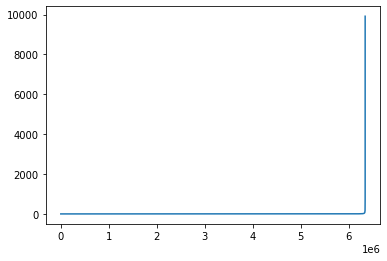

Log2 graph: 



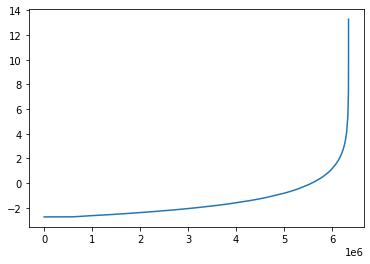

Log10 graph: 

log2 graph after changing all numbers less than 2 to 2: 



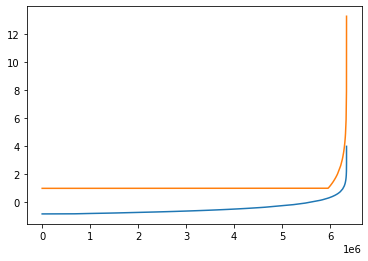

Log10 graph after changing all numbers less than 2 to 2: 



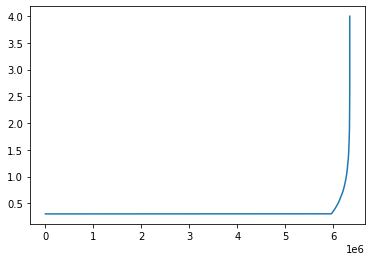

In [49]:
import numpy as np
print("Regular graph: \n")
plt.plot(sorted(values))
plt.show()
print("Log2 graph: \n")
plt.plot(sorted(np.log2(values)))
plt.show()
print("Log10 graph: \n")
plt.plot(sorted(np.log10(values)))
with_no_negative=[x if x>2 else 2 for x in values]
print("log2 graph after changing all numbers less than 2 to 2: \n")
plt.plot(sorted(np.log2(with_no_negative)))
plt.show()
print("Log10 graph after changing all numbers less than 2 to 2: \n")
plt.plot(sorted(np.log10(with_no_negative)))
plt.show()






# PAGE VIEW RESEARCH

In [44]:
# Paths
# Using user page views (as opposed to spiders and automated traffic) for the 
# month of August 2021
pv_path = 'https://dumps.wikimedia.org/other/pageview_complete/monthly/2021/2021-08/pageviews-202108-user.bz2'
p = Path(pv_path) 
pv_name = p.name
pv_temp = f'{p.stem}-4dedup.txt'
pv_clean = f'{p.stem}.pkl'
# Download the file (2.3GB) 
print(pv_name)
print(pv_temp)
print(pv_clean)


!wget -N $pv_path
# Filter for English pages, and keep just two fields: article ID (3) and monthly 
# total number of page views (5). Then, remove lines with article id or page 
# view values that are not a sequence of digits.
!bzcat $pv_name | grep "^en\.wikipedia" | cut -d' ' -f3,5 | grep -P "^\d+\s\d+$" > $pv_temp
# Create a Counter (dictionary) that sums up the pages views for the same 
# article, resulting in a mapping from article id to total page views.


pageviews-202108-user.bz2
pageviews-202108-user-4dedup.txt
pageviews-202108-user.pkl
--2022-01-08 12:45:54--  https://dumps.wikimedia.org/other/pageview_complete/monthly/2021/2021-08/pageviews-202108-user.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2503235912 (2.3G) [application/octet-stream]
Saving to: ‘pageviews-202108-user.bz2’

pageviews-202108-us 100%[===================>]   2.33G  4.49MB/s    in 8m 47s  

2022-01-08 12:54:42 (4.53 MB/s) - ‘pageviews-202108-user.bz2’ saved [2503235912/2503235912]



In [45]:
wid2pv = Counter()
with open(pv_temp, 'rt') as f:
  for line in f:
    parts = line.split(' ')
    if int(parts[0]) in page_rank:
      wid2pv.update({int(parts[0]): int(parts[1])})

print(len(list(wid2pv.items())))
print(list(wid2pv.items())[:100])

6299824
[(7712754, 28713), (3632887, 528), (600744, 4285), (59804426, 61650), (4838455, 1450), (4822278, 779), (2556962, 594), (55029148, 123), (16381751, 209), (4700151, 1322), (5840274, 165), (1669534, 6340), (714570, 429), (594417, 7342), (1202168, 8311), (321544, 18535), (8355009, 64), (10936290, 27), (2978668, 288), (2349724, 4248), (4906617, 1997), (8004648, 93), (143804, 273), (1222755, 908), (4077845, 73), (5297162, 333), (1163095, 408), (14876253, 69), (9378013, 79), (6395043, 254), (1729032, 5426), (32566233, 2767), (47197315, 82), (5026730, 242), (221489, 8884), (10558683, 665), (1880521, 6984), (5886374, 1104), (22554980, 99194), (7198790, 391), (5260031, 397), (2597833, 646), (11934775, 54), (40042954, 3854), (3600326, 10684), (810047, 8062), (35473107, 6604), (5345208, 89), (20305346, 4402), (4189233, 424), (41274137, 14502), (712947, 174), (1921683, 344), (24976075, 287), (60432262, 134), (9179902, 30), (6893310, 122), (1283026, 3493), (2222596, 6870), (2516600, 2723), (

In [47]:
sort_dic_by_id = sorted(list(wid2pv.items()),key=lambda x: x[0])
print(sort_dic_by_id[:20])
print(sort_dic_by_id[-20:])
sort_dic_by_value = sorted(list(wid2pv.items()),key=lambda x: x[1])
print(sort_dic_by_value[:20])
print(sort_dic_by_value[-20:])



[(12, 75195), (25, 114746), (39, 24532), (290, 164494), (303, 111033), (305, 135191), (307, 343343), (308, 151041), (309, 2961), (316, 7167), (324, 223758), (330, 39), (332, 1199), (334, 5597), (336, 25818), (339, 126270), (340, 1222), (344, 1158), (358, 168853), (359, 6074)]
[(68380086, 32), (68380089, 36), (68380099, 87), (68380119, 363), (68380123, 179), (68380125, 30), (68380130, 39), (68380135, 56), (68380140, 20), (68380154, 11), (68380162, 69), (68380166, 613), (68380168, 70), (68380178, 75), (68380195, 30), (68380200, 27), (68380202, 61), (68380227, 29), (68380232, 8), (68380237, 19)]
[(34430484, 1), (57379550, 1), (31598121, 1), (1017811, 1), (1135377, 1), (1190919, 1), (1240240, 1), (1313177, 1), (1316561, 1), (1351060, 1), (1381549, 1), (141167, 1), (141211, 1), (14732159, 1), (1476257, 1), (1523571, 1), (1620964, 1), (1681079, 1), (1799496, 1), (1811387, 1)]
[(60476189, 1887714), (3630757, 1890062), (60203476, 1967889), (1384520, 2024231), (332667, 2141907), (65625519, 2194

In [55]:

values_view = sorted(list(wid2pv.values()),reverse=True)
num_of_pages =(len(values_view))
pstdev=statistics.pstdev(values_view)
variance = statistics.pvariance(values_view)
median = statistics.median(values_view)

#max_r = max(values)
#min_r = min(values) 


print(f"number of pages: {num_of_pages}\n")
print(f"Max page views is : 181126232 \n")
print(f"Min page views is : 1 \n")
print(f"Median of page views is : {median}\n")
print(f"pstdev of page views is : {pstdev}\n")
print(f"variance of page views is : {variance}\n")
print(f"average of page views is : {sum(values_view)/len(values_view)}")


number of pages: 6299824

Max page views is : 181126232 

Min page views is : 1 

Median of page views is : 59.0

pstdev of page views is : 73096.87993752112

variance of page views is : 5343153856.600378

average of page views is : 1136.696084843005


Regular graph: 



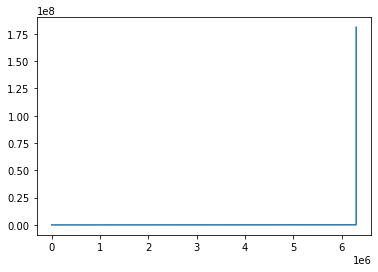

Log2 graph: 



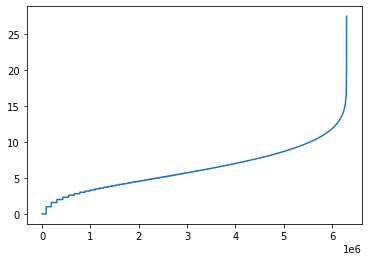

Log10 graph: 



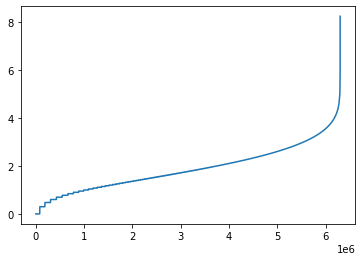

In [58]:
print("Regular graph: \n")
plt.plot(sorted(values_view))
plt.show()
print("Log2 graph: \n")
plt.plot(sorted(np.log2(values_view)))
plt.show()
print("Log10 graph: \n")
plt.plot(sorted(np.log10(values_view)))

